# Projet : Prédiction des prix de maisons (House Prices)

🎯 Objectif

* Appliquer la régression linéaire et logistique si besoin
* Utiliser Ridge et Lasso pour régularisation
* Évaluer et visualiser les performances du modèle
* Créer un notebook propre à mettre sur GitHub

1️⃣ Dataset

* Kaggle House Prices – Advanced Regression Techniques :
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

2️⃣ Étapes du projet

**1. Importation des librairies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

**2. Chargement et exploration des données**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#lire data ou collecter données
data =pd.read_csv('/content/drive/MyDrive/data/train.csv')

In [6]:
print(data.head())
print(data.info())
print(data.describe())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

**3. Prétraitement**

* Gérer les valeurs manquantes (fillna ou dropna)
* Encoder les variables catégorielles (pd.get_dummies)
* Normaliser/standardiser les données si nécessaire

In [7]:
# Exemple : encoder les variables catégorielles
data = pd.get_dummies(data, drop_first=True)

# Séparer features et target
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print("Number of NaNs in X_train:", np.isnan(X_train).sum())
print("Number of NaNs in X_test:", np.isnan(X_test).sum())


Number of NaNs in X_train: Id                         0
MSSubClass                 0
LotFrontage              217
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 245, dtype: int64
Number of NaNs in X_test: Id                        0
MSSubClass                0
LotFrontage              42
LotArea                   0
OverallQual               0
                         ..
SaleCondition_AdjLand     0
SaleCondition_Alloca      0
SaleCondition_Family      0
SaleCondition_Normal      0
SaleCondition_Partial     0
Length: 245, dtype: int64


In [10]:
# 1 Assuming X_train and X_test are pandas DataFrames
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align y_train with X_train
X_test = X_test.dropna()
y_test = y_test[X_test.index]     # Align y_test with X_test


In [13]:
# 2
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [14]:
# 3
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)


HistGradientBoostingRegressor()

**4. Entraîner différents modèles**

In [15]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge R²:", r2_score(y_test, y_pred_ridge))

# Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Linear Regression R²: 0.7199205700475485
RMSE: 48207.698272830545
Ridge R²: 0.8642849587056745
Lasso R²: 0.6892076412608195


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.775e+11, tolerance: 5.786e+08
  model = cd_fast.enet_coordinate_descent(


**5. Visualisations**

* Scatter plot : y_test vs y_pred
* Barplot : coefficients Ridge et Lasso
* Histogramme des erreurs (résidus)

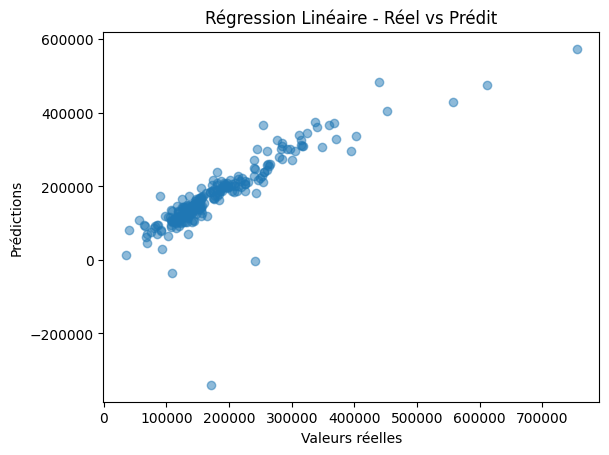

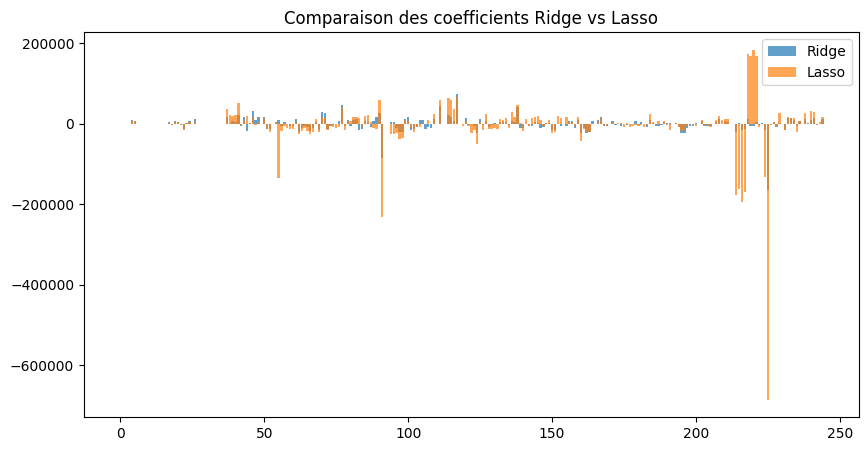

In [16]:
# Scatter plot réel vs prédit
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Linéaire - Réel vs Prédit")
plt.show()

# Coefficients
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge.coef_)), ridge.coef_, alpha=0.7, label="Ridge")
plt.bar(range(len(lasso.coef_)), lasso.coef_, alpha=0.7, label="Lasso")
plt.legend()
plt.title("Comparaison des coefficients Ridge vs Lasso")
plt.show()
